## Problem 2. Regression and Random Forest (25 points)
### 2.1 Linear Regression (10 points)
#### Let predict target as $\hat{y}$, input as $x$, real target as $y$, the weight of input $x$ as $w$, the bias as $b$.
(1) Write the form of optimization problem of linear regression (2 points).   
(2) Write the form of loss function $L$ for linear regression and   computate $\frac{\partial L}{\partial w},\frac{\partial L}{\partial b}$ (3 points).  
**Answer**:  
(1) Find the best $w$ to minimize the loss function $L$  
$\arg\min_w\frac{1}{m} \sum_{i=1}^{m}\left(w^{T} x^{(i)}-y^{(i)}\right)^{2}$  
(2) $L(w)=\frac{1}{m} \sum_{i=1}^{m}\left(w^{T} x^{(i)}-y^{(i)}\right)^{2}$  
    $\frac{\partial}{\partial w_{j}} L\left(w\right)=\frac{2}{m} \sum_{i=1}^{m}\left(w^{T} x^{(i)}-y^{(i)}\right) x_{j}^{(i)}$  
    $\because$ $w_0=b$  
    $\therefore$ $\frac{\partial L}{\partial b}=\frac{2}{m} \sum_{i=1}^{m}\left(w^{T} x^{(i)}-y^{(i)}\right) x_{0}^{(i)}$

In [1]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
x = np.linspace(0,1,20)
y = x+ 2*x**2+3*x**3+np.sin(2*np.pi*x)
y=y+np.random.normal(0,0.5,y.shape)
# different degree
M=[1,5,10]


(3) please use polynomial regression to complete this code and compare the performance of different degree (given as M) to fit data. (5 points)   
requirement: show the figure of data points and the curve fitted by your model on the condition of different degree. 
**Hint**: you can use scikit-learn api function. 

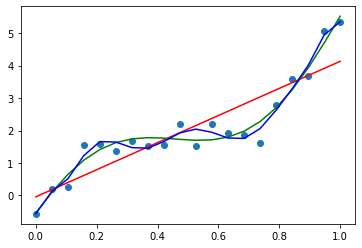

In [10]:
# put your code here 
##########################################################
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
x = np.linspace(0,1,20)
y = x+ 2*x**2+3*x**3+np.sin(2*np.pi*x)
y=y+np.random.normal(0,0.5,y.shape)
# different degree
M=[1,5,10]


x1=x.reshape(-1,1)

# poly = PolynomialFeatures(degree=1)
# x2=poly.fit_transform(x1)


def mypipeline(degree,x1,y):
    poly_reg = Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('lin_reg',LinearRegression())
    ])
    poly_reg.fit(x1,y)
    y_predict = poly_reg.predict(x1)
    return y_predict

y1=mypipeline(M[0],x1,y)
y2=mypipeline(M[1],x1,y)
y3=mypipeline(M[2],x1,y)
plt.scatter(x, y)
# plt.plot(np.sort(x),y_predict[np.argsort(x)],color='r')
plt.plot(x1,y1,color='r')
plt.plot(x1,y2,color='g')
plt.plot(x1,y3,color='b')
plt.show()
##########################################################

### 2.2 Random Forest (15 points)
(1) please write the computational formula of Gini Impurity (5 points).   
**Answer:**  
(1)$G=\sum_{i=1}^{C} p(i) *(1-p(i))$

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import random

iris = load_iris()
index=list(range(iris.data.shape[0]))
random.shuffle(index)
train_x,train_y=iris.data[index[:120]], iris.target[index[:120]]
test_x,test_y=iris.data[index[120:]], iris.target[index[120:]]
N=[3,10,20]

(2) In this section you should use the random forest method to predict the class of iris on different numbers (given as N) of decision trees and compute the L1 loss for each status.(Hint: When you compute the loss, for each N you should run 50 times and take the average), the result of loss should be printed or visualized. (7 points)

In [5]:
# put your code here 
##########################################################
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import random

iris = load_iris()
index=list(range(iris.data.shape[0]))
random.shuffle(index)
train_x,train_y=iris.data[index[:120]], iris.target[index[:120]]
test_x,test_y=iris.data[index[120:]], iris.target[index[120:]]
N=[3,10,20]     

L1sum_0=0
forest0=RandomForestClassifier(n_estimators=N[0])
for i in range(50):
    forest0.fit(train_x,train_y)
    pre_x=forest0.predict(test_x)
    L1=np.sum(np.abs(test_y-pre_x))/np.shape(test_y)[0]
    L1sum_0+=L1
#     print(L1)
L1_average_0=L1sum_0/np.shape(test_y)[0]


L1sum_1=0
forest1=RandomForestClassifier(n_estimators=N[1])
for i in range(50):
    forest1.fit(train_x,train_y)
    pre_x=forest1.predict(test_x)
    L1=np.sum(np.abs(test_y-pre_x))/np.shape(test_y)[0]
    L1sum_1+=L1
#     print(L1)
L1_average_1=L1sum_1/np.shape(test_y)[0]


L1sum_2=0
forest2=RandomForestClassifier(n_estimators=N[2])
for i in range(50):
    forest2.fit(train_x,train_y)
    pre_x=forest2.predict(test_x)
    L1=np.sum(np.abs(test_y-pre_x))/np.shape(test_y)[0]
    L1sum_2+=L1
#     print(L1)
L1_average_2=L1sum_2/np.shape(test_y)[0]
print(L1_average_0)
print(L1_average_1)
print(L1_average_2)
    
    
##########################################################

0.035555555555555556
0.021111111111111112
0.013333333333333332
<class 'numpy.float64'>


(3) In this section you should use export_graphviz() function and package graphviz to visualize the single decision tree based on your constructed random forest. (3 points)

[Text(133.92000000000002, 190.26, 'X[2] <= 2.35\ngini = 0.66\nsamples = 72\nvalue = [37, 48, 35]'),
 Text(66.96000000000001, 135.9, 'gini = 0.0\nsamples = 27\nvalue = [37, 0, 0]'),
 Text(200.88000000000002, 135.9, 'X[2] <= 5.2\ngini = 0.488\nsamples = 45\nvalue = [0, 48, 35]'),
 Text(133.92000000000002, 81.53999999999999, 'X[3] <= 1.75\ngini = 0.077\nsamples = 26\nvalue = [0, 48, 2]'),
 Text(66.96000000000001, 27.180000000000007, 'gini = 0.0\nsamples = 24\nvalue = [0, 48, 0]'),
 Text(200.88000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 81.53999999999999, 'gini = 0.0\nsamples = 19\nvalue = [0, 0, 33]')]

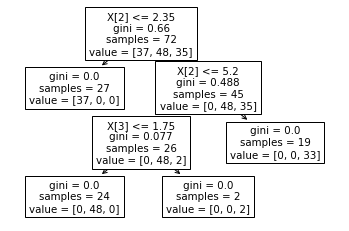

In [82]:
# visualize single tree
# put your code here
##########################################################
estimator = forest1.estimators_[9]
plot_tree(estimator)
        
        
        
##########################################################